In [1]:
from Modules.Tokenizer import tokenize, tokenizeSRT
from Modules import AnkiConnect as anki
from collections import Counter
from rich import print
import math
from jamdict import Jamdict

In [22]:
dictJP = Jamdict()

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def HeatMapPrint(words_and_freqs: list, filter: bool) -> None:
    words = [word for word, _ in words_and_freqs]
    lookup_results = {word: dictJP.lookup(word) for word in words}

    freqs = [freq for _, freq in words_and_freqs]
    median = float(freqs[len(freqs) // 2])

    string_to_print = ''
    for word, freq in words_and_freqs:
        normalized_freq = float(freq) - median
        green = sigmoid(normalized_freq-2)
        red = sigmoid(-normalized_freq + 1)
        blue = sigmoid(-normalized_freq + 5)

        info = lookup_results[word]
        if info.names and not info.entries:
            if filter: continue
            string_to_print += f'[b][#ff3366]{word}:[#ff6699]{freq}[/], '
        else:
            string_to_print += f'[b][#{format(int(red * 255), "02x")}{format(int(green * 255), "02x")}{format(int(blue * 255), "02x")}]{word}:[#{format(int((red**0.4) * 255), "02x")}{format(int((green**0.2) * 255), "02x")}{format(int((blue**0.4) * 255), "02x")}]{freq}[/], '

    print(string_to_print)


#### Testing Sample
##### Sample of N2 読解
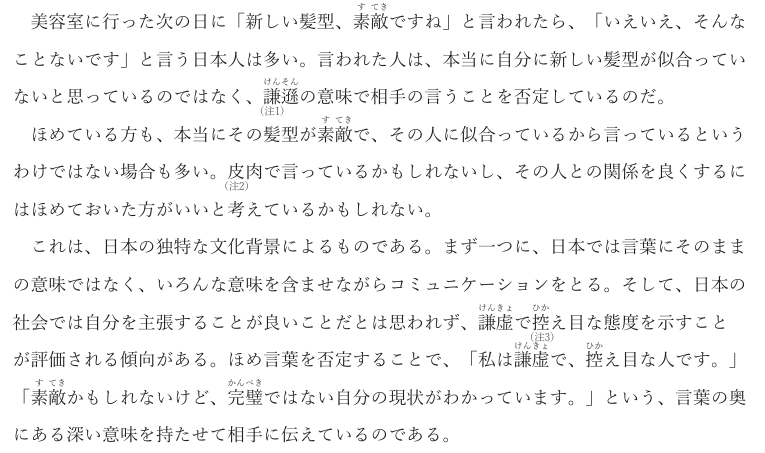

In [10]:
# words = tokenize("すてき美容室に行った次の日に「新しい髪型、素敵ですね」と言われたら、「いえいえ、そんなことないです」と言う日本人は多い。言われた人は、本当に自分に新しい髪型が似合っていけんそんないと思っているのではなく、謙遜の意味で相手の言うことを否定しているのだ。(注いすてきほめている方も、本当にその髪型が素敵で、その人に似合っているから言っているというわけではない場合も多い。皮肉で言っているかもしれないし、その人との関係を良くするに(注 2 )はほめておいた方がいいと考えているかもしれない。これは、日本の独特な文化背景によるものである。まず ー っに、日本では言葉にそのままの意味ではなく、いろんな意味を含ませながらコミュニケ ー ションをとる。そして、日本のけんきょひか社会では自分を主張することが良いことだとは思われず、謙虚で控え目な態度を示すことひかが評価される傾向がある。ほめ言葉を否定することで、「私は謙虚で、控え目な人です。」すてきかんべき「素敵かもしれないけど、完璧ではない自分の現状がわかっています。」という、言葉の奥にある深い意味を持たせて相手に伝えているのである。")
# words = tokenize("仕事て遅刻、早退、欠動をすると、同僚や上司、お客さまに迷惑をかけてしまいます。学生とは違い、自分だけの問題てはあリませんのて、まずは遅刻、早退、欠勤をしないことが誉本てす。〔ら〔ミ〔ら〕、どうしても遅刻、早退、欠勤をしてしまう場合は、すぐに連絡をし、理由を伝えて上司の許可を得ましよう。仕事を引き継ぐなどして、なるべく迷惑カ・かからないように対応すること大切てす。〔〕再を〕連絡するときは、必ず電話て連絡をしましよう。メ ー ルて連絡をしてもすぐに相手カぐ確認してくれるかわかりません。")
# freqWords = Counter(words).most_common()
words = tokenizeSRT("./subtitles")
freqWords = Counter(words).most_common()

Processing file: ./subtitles\逃げ上手の若君.S01E01.5月22日.WEBRip.Netflix.ja.srt

In [20]:
HeatMapPrint(freqWords)

時行:49, 頼重:27, 狩野:24, 塩田:18, 私:16, 高:13, 氏:13, 英雄:12, 兵:12, 音:11, 邦時:11, 
何:11, 新田:11, ハァハァ:10, 逃げる:10, 者:10, 死ぬ:10, 生きる:9, 上:9, ~:8, 足利:8, 誰:8, 
父:8, 武士:7, 鎌倉:7, 清子:7, 隠れる:7, 円:6, 喜:6, 未来:6, 幕府:6, 子:6, 上手:5, 方:5, 
北条:5, 父さま:5, 雫:5, 高氏:4, 今:4, 君:4, 継ぐ:4, 中:4, 上げる:4, 馬:4, 力:4, 国:4, 諏訪:4,
祈祷:4, 男:4, 見える:4, 分かる:4, 軍:4, 天下:4, 全て:4, 潔い:3, 稽古:3, 危ない:3, 京:3, 
我が:3, 待つ:3, 将来:3, 摂津:3, 違う:3, 飾り:3, 王:3, 我:3, 怠惰:3, 臆病:3, お前:3, 女性:3, 
笑顔:3, 見る:3, 信濃:3, 申す:3, 敵:3, 必ず:3, 年:3, 声:3, 恥:3, 底:3, 延びる:3, 殺す:3, 
取る:3, 死:2, 時代:2, 生涯:2, 弓:2, 時間:2, 馬鹿:2, 笑い声:2, 若い:2, 若君:2, 行く:2, 
後醍醐:2, 鎮める:2, 家:2, 忠義:2, 主君:2, 高時:2, 手:2, 前:2, 日:2, 2人:2, 後継:2, 時:2, 
行:2, 早い:2, 兄:2, 嫌:2, 家人:2, 好き:2, 町:2, 怪物:2, 目:2, 神官:2, 間:2, 失礼:2, 神聖:2, 
神力:2, 怪しい:2, 木:2, 気:2, 幸せ:2, 人:2, 塩梅:2, 全部:2, 後:2, 入る:2, 伝令:2, 太守:2, 
大将:2, 裏切り:2, 刺さる:2, 皆:2, 日本:2, 地獄:2, 泣き声:2, 偽り:2, 討つ:2, 師:2, 言う:2, 
信ずる:2, 滅ぼす:2, 才能:2, 飛来:2, 続ける:2, 始まり:2, 勇敢:1, 討ち死:1, 自害:1, 戦い:1, 
名誉:1, 怒濤:1, 華々しい:1, 抜く:1, 尊氏:1, 描く:1, 物語:1, ハァ:1, 身軽:1, 感心:1, 場合:1, 
風:1, 下りる:1, 止める:1, 何事:1, 騒々しい:1, 出立:1, 逃げ足:1, 下がる:1, 通す:1, 足音:1, 
相:1, 変わる:1, 隠れ鬼:1, 先帝:1, 乱:1, ご覧:1, 頼もしい:1, 思う:1, 武家:1, 繁栄:1, 鬼神:1, 
活躍:1, 祈る:1, 師直:1, 気後れ:1, 跡継ぎ:1, 命令:1, 立場:1, 夫:1, 婚約:1, 覚え:1, 辺:1, 
今度:1, 得意:1, 同じ:1, 器:1, 高資:1, 件:1, 任せる:1, 贅沢:1, 暮らし:1, 才:1, 逃げ腰:1[0

In [23]:
words = [word for word, _ in freqWords] 
results = anki.has(words)

important_words = [word for word, result in zip(words, results) if not result]
freq_dict = dict(freqWords)
important_words = [word for word, result in zip(words, results) if not result]
important_words_with_freq = [(word, freq_dict.get(word, 0)) for word in important_words]

HeatMapPrint(important_words_with_freq, True)

塩田:18, 高:13, 氏:13, 英雄:12, 邦時:11, 新田:11, ハァハァ:10, ~:8, 武士:7, 鎌倉:7, 円:6, 
幕府:6, 上手:5, 父さま:5, 雫:5, 継ぐ:4, 祈祷:4, 天下:4, 潔い:3, 稽古:3, 京:3, 我が:3, 摂津:3,
飾り:3, 我:3, 怠惰:3, 臆病:3, お前:3, 信濃:3, 恥:3, 延びる:3, 生涯:2, 弓:2, 笑い声:2, 若君:2,
鎮める:2, 忠義:2, 主君:2, 2人:2, 後継:2, 行:2, 家人:2, 怪物:2, 神官:2, 失礼:2, 神聖:2, 
神力:2, 塩梅:2, 伝令:2, 太守:2, 大将:2, 裏切り:2, 刺さる:2, 皆:2, 泣き声:2, 偽り:2, 討つ:2, 
師:2, 信ずる:2, 滅ぼす:2, 飛来:2, 始まり:2, 勇敢:1, 討ち死:1, 自害:1, 名誉:1, 怒濤:1, 
華々しい:1, ハァ:1, 身軽:1, 何事:1, 騒々しい:1, 出立:1, 逃げ足:1, 相:1, 隠れ鬼:1, 先帝:1, 
乱:1, ご覧:1, 頼もしい:1, 武家:1, 繁栄:1, 鬼神:1, 活躍:1, 気後れ:1, 跡継ぎ:1, 夫:1, 婚約:1, 
覚え:1, 辺:1, 得意:1, 件:1, 贅沢:1, 暮らし:1, 才:1, 逃げ腰:1, 名家:1, 嫁ぎ先:1, 合格:1, 
負える:1, 鎧:1, 丸:1, 大騒ぎ:1, 名目:1, 示し:1, 病弱:1, やる気:1, 跡:1, 順序:1, 側室:1, 
争い:1, 正々:1, 堂々:1, 血筋:1, 自慢:1, 侍女:1, 若:1, 地位:1, 文武:1, 無用:1, 長物:1, 鈴:1, 
初:1, 登る:1, 後光:1, だだ漏れ:1, 弱:1, 守護:1, 仰す:1, 完了:1, 旨:1, 秘術:1, 事務:1, 
優れる:1, 手伝い:1, 拾える:1, 後半:1, 疑い:1, 定義:1, 関する:1, う~ん:1, 断片:1, 占い師:1, 
歳:1, 揺るがす:1, 大戦:1, 敬う:1, 豆粒:1, 大:1, 危機:1, 察知:1, 霊感:1, 詐欺:1, 小遣い:1, 
騙す:1, 栄華:1, 出入り:1, 本っ当:1, 格:1, 整う:1, 謀反:1, 八幡:1, 大菩薩:1, 加護:1, 天皇:1, 
内通:1, 壊滅:1, 名声:1, 瞬く:1, 膨れる:1, 嫡男:1, 総:1, 最期:1, 死なす:1, 忍ぶ:1, 逃がす:1, 
命ずる:1, 領地:1, 鬨の声:1, 眼:1, 性:1, 万が一:1, 備える:1, 先:1, 丘:1, 配下:1, 大した:1, 
絵図:1, 周到:1, 下野:1, 御:1, 完:1, 璧:1, 偽る:1, はち切れる:1, 身内:1, 討てる:1, 源:1, 公:1,
平家:1, 丸ごと:1, たわ言:1, 後世:1, [1;38;2;1